In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont


In [6]:
# ============================================================================
# CREATE TRAINING GIF FROM EPOCH IMAGES
# ============================================================================

def create_training_gif(output_dir, max_epochs=None, fps=5, gif_name=None):

    all_epoch_imgs = sorted([
        os.path.join(output_dir, f) for f in os.listdir(output_dir)
        if f.startswith("epoch_") and f.endswith(".png")
    ], key=lambda x: int(x.split("epoch_")[1].split(".")[0]))

    if max_epochs is not None:
        max_epochs = min(max_epochs, len(all_epoch_imgs))
        all_epoch_imgs = all_epoch_imgs[:max_epochs]

    if len(all_epoch_imgs) == 0:
        print("No epoch images found")
        return None

    if gif_name is None:
        gif_name = f"training_progress_{len(all_epoch_imgs)}.gif"

    gif_path = os.path.join(output_dir, gif_name)

    # Read all images and add epoch counter
    frames = []
    try:
        font = ImageFont.truetype("arial.ttf", 32)
    except:
        font = ImageFont.load_default()

    for i, img_path in enumerate(all_epoch_imgs, 1):
        img = Image.open(img_path).convert('RGB')
        draw = ImageDraw.Draw(img)
        text = f"Epoch: {i}/{len(all_epoch_imgs)}"
        draw.text((10, 10), text, fill=(255, 255, 255), font=font)
        frames.append(img)

    # Save as animated GIF
    duration = int(1000 / fps)
    frames[0].save(gif_path, save_all=True, append_images=frames[1:],
                   duration=duration, loop=0)

    print(f"Saved GIF: {gif_path} ({len(all_epoch_imgs)} frames @ {fps} fps)")
    return gif_path


# create_training_gif("output_dcgan", max_epochs=150, fps=5)
# create_training_gif("output_cyclegan_s2w", max_epochs=150, fps=5)


In [7]:
# ============================================================================
# PLOT LOSS CURVES
# ============================================================================

def plot_losses(losses, labels=None, title="Training Loss Curves",
                output_path=None, window=100, figsize=(12, 5), dpi=150):

    # Normalize to list format
    if not isinstance(losses[0], (list, tuple)):
        losses = [losses]
        labels = [labels] if labels else ["Loss"]
    else:
        if labels is None:
            labels = [f"Loss {i+1}" for i in range(len(losses))]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Raw losses
    for loss_array, label in zip(losses, labels):
        ax1.plot(loss_array, label=label, alpha=0.7)

    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Loss')
    ax1.set_title('Raw Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Smoothed losses
    for loss_array, label in zip(losses, labels):
        if len(loss_array) > window:
            smoothed = [
                sum(loss_array[max(0, i - window):i + 1]) / min(i + 1, window)
                for i in range(len(loss_array))
            ]
            ax2.plot(smoothed, label=label, alpha=0.8)
        else:
            ax2.plot(loss_array, label=label, alpha=0.7)

    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Loss')
    ax2.set_title(f'Smoothed (window={window})')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=dpi, bbox_inches='tight')
        print(f"Saved: {output_path}")

    plt.show()
    return output_path


✅ Loaded checkpoint: output_dcgan\checkpoint_epoch_500.pth (epoch 500)
Loaded epoch 500
✅ Saved: output_dcgan\loss_discriminator.png


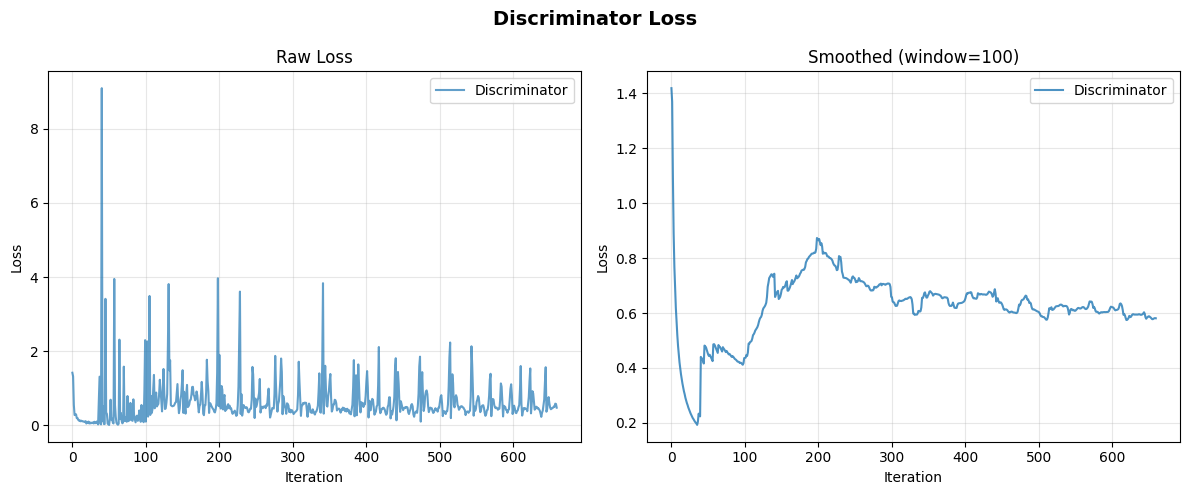

✅ Saved: output_dcgan\loss_generator.png


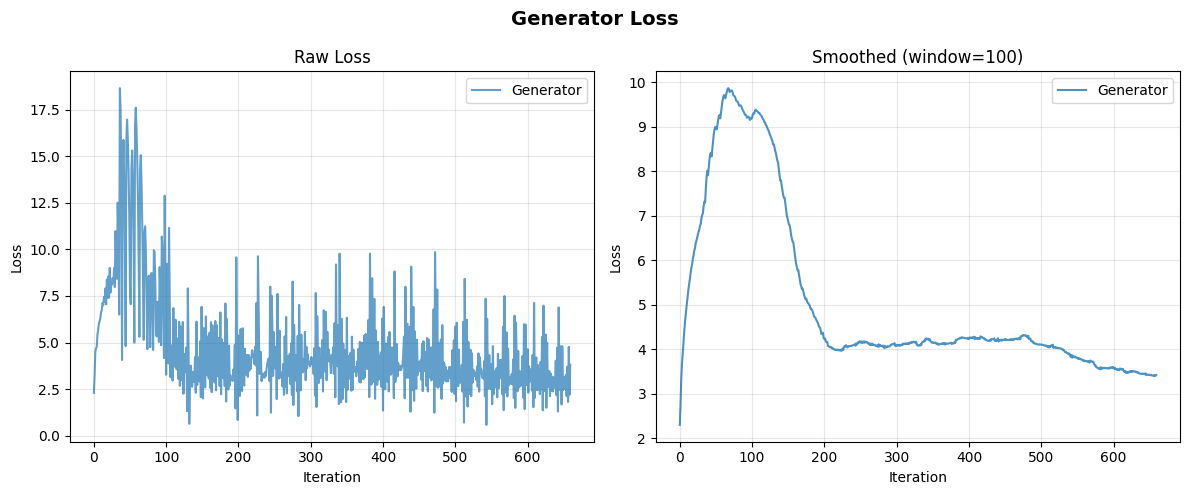

In [10]:
# ============================================================================
# DCGAN LOSS CURVES
# ============================================================================

# from Model import load_checkpoint_generic
#
# checkpoint_dir = "output_dcgan"
# checkpoint = load_checkpoint_generic(checkpoint_dir, device='cpu')
#
# if checkpoint:
#     G_losses = checkpoint.get('G_losses', [])
#     D_losses = checkpoint.get('D_losses', [])
#
#     print(f"Loaded epoch {checkpoint.get('epoch', '?')}")
#
#     plot_losses(
#         losses=D_losses,
#         labels="Discriminator",
#         title="Discriminator Loss",
#         output_path=os.path.join(checkpoint_dir, "loss_discriminator.png"),
#         window=100
#     )
#
#     plot_losses(
#         losses=G_losses,
#         labels="Generator",
#         title="Generator Loss",
#         output_path=os.path.join(checkpoint_dir, "loss_generator.png"),
#         window=100
#     )


✅ Loaded checkpoint: output_cyclegan_a2o\checkpoint_epoch_50.pth (epoch 50)
Loaded epoch 50
✅ Saved: output_cyclegan_a2o\loss_discriminators.png


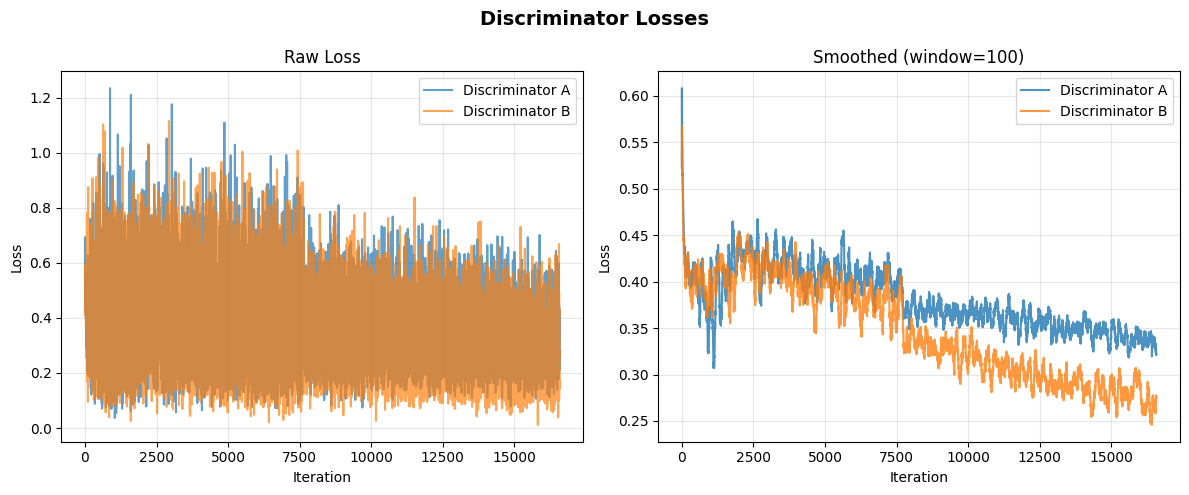

✅ Saved: output_cyclegan_a2o\loss_generator.png


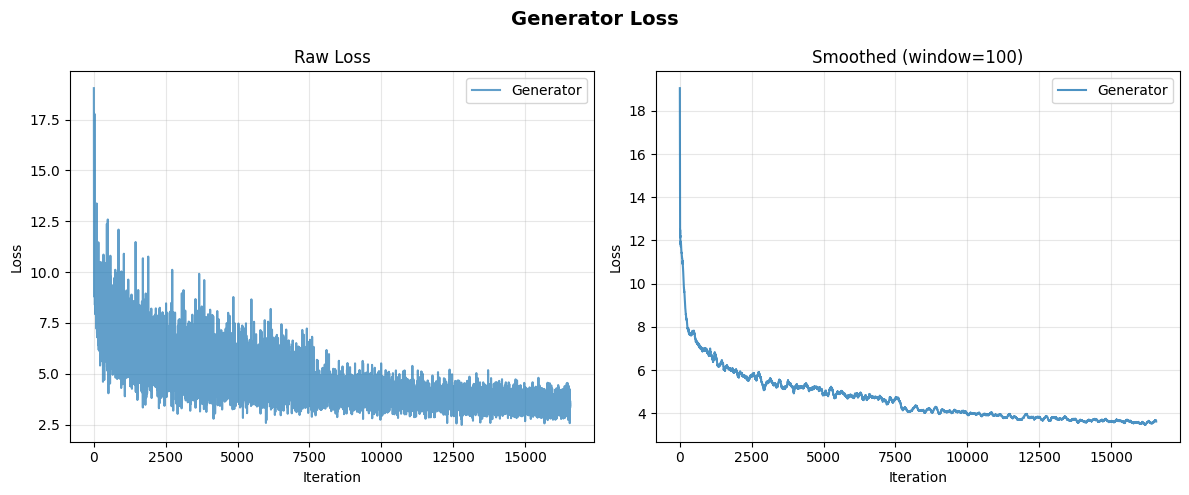

In [9]:
# ============================================================================
# CYCLEGAN LOSS CURVES
# ============================================================================

# from Model import load_checkpoint_generic
#
# checkpoint_dir = "output_cyclegan_a2o"
# checkpoint = load_checkpoint_generic(checkpoint_dir, device='cpu')
#
# if checkpoint:
#     G_losses = checkpoint.get('G_losses', [])
#     D_A_losses = checkpoint.get('D_A_losses', [])
#     D_B_losses = checkpoint.get('D_B_losses', [])
#
#     print(f"Loaded epoch {checkpoint.get('epoch', '?')}")
#
#     plot_losses(
#         losses=[D_A_losses, D_B_losses],
#         labels=["Discriminator A", "Discriminator B"],
#         title="Discriminator Losses",
#         output_path=os.path.join(checkpoint_dir, "loss_discriminators.png"),
#         window=100
#     )
#
#     plot_losses(
#         losses=G_losses,
#         labels="Generator",
#         title="Generator Loss",
#         output_path=os.path.join(checkpoint_dir, "loss_generator.png"),
#         window=100
#     )
